In [20]:
import pandas as pd
import geopandas
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
montreal = pd.read_csv('./data/montreal.csv')
montreal.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,534948,https://www.airbnb.com/rooms/534948,20230902231108,2023-09-03,city scrape,Rental unit in Montreal · ★4.83 · 2 bedrooms ·...,<b>The space</b><br />The apartment is fully e...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1610679,...,5.00,4.83,4.83,NaN,f,1,1,0,0,0.05
1,542160,https://www.airbnb.com/rooms/542160,20230902231108,2023-09-03,city scrape,Condo in Montreal · ★4.77 · 1 bedroom · 1 bed ...,<b>The space</b><br />I am renting my lovely c...,"Le plateau Mont-Royal is in my opinion, the be...",https://a0.muscache.com/pictures/29641965/040b...,2666170,...,4.89,4.68,4.78,"284723, expires: 2024-06-30",f,2,2,0,0,1.70
2,556742,https://www.airbnb.com/rooms/556742,20230902231108,2023-09-03,city scrape,Rental unit in Montreal · ★4.83 · 2 bedrooms ·...,The building is occupied by families mostly. T...,"This neighborhood is our favorite, the Avenue ...",https://a0.muscache.com/pictures/9263006/946af...,2737452,...,4.94,4.83,4.80,NaN,f,2,2,0,0,0.94
3,564098,https://www.airbnb.com/rooms/564098,20230902231108,2023-09-03,city scrape,Rental unit in Montreal · ★4.80 · 1 bedroom · ...,A bright and sunny upper triplex on a tree-lin...,"Location: On the edge of the Plateau, close to...",https://a0.muscache.com/pictures/7314398/a9b57...,2542265,...,4.82,4.64,4.73,NaN,f,2,2,0,0,0.09
4,29059,https://www.airbnb.com/rooms/29059,20230902231108,2023-09-03,city scrape,Rental unit in Montreal · ★4.67 · 1 bedroom · ...,CITQ 267153<br />Lovely studio with 1 closed r...,NaN,https://a0.muscache.com/pictures/736399/fa6c31...,125031,...,4.76,4.81,4.69,"267153, expires: 2024-03-31",f,1,1,0,0,2.71


In [3]:
montreal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7933 entries, 0 to 7932
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7933 non-null   int64  
 1   listing_url                                   7933 non-null   object 
 2   scrape_id                                     7933 non-null   int64  
 3   last_scraped                                  7933 non-null   object 
 4   source                                        7933 non-null   object 
 5   name                                          7933 non-null   object 
 6   description                                   7887 non-null   object 
 7   neighborhood_overview                         4298 non-null   object 
 8   picture_url                                   7933 non-null   object 
 9   host_id                                       7933 non-null   i

## Exploratory data analysis

In [6]:
columns_of_interest = [
    "name",
    "description",
    "listing_url",
    "host_id",
    "host_location",
    "neighbourhood",
    "neighbourhood_cleansed",
    "neighborhood_overview",
    "latitude",
    "longitude",
    "property_type",
    "room_type",
    "beds",
    "amenities",
    "price",
    "minimum_nights",
    "maximum_nights",
    "availability_365",
    "number_of_reviews",
    "review_scores_rating",
]

montreal_df = montreal[columns_of_interest]

montreal_df.head()

,name,description,listing_url,host_id,host_location,neighbourhood,neighbourhood_cleansed,neighborhood_overview,latitude,longitude,property_type,room_type,beds,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating
0,Rental unit in Montreal · ★4.83 · 2 bedrooms ·...,<b>The space</b><br />The apartment is fully e...,https://www.airbnb.com/rooms/534948,1610679,"Bissau, Guinea-Bissau",NaN,Le Sud-Ouest,NaN,45.48730,-73.57330,Entire rental unit,Entire home/apt,2.0,"[""Bed linens"", ""Outdoor dining area"", ""Resort ...",$88.00,31,62,56,6,4.83
1,Condo in Montreal · ★4.77 · 1 bedroom · 1 bed ...,<b>The space</b><br />I am renting my lovely c...,https://www.airbnb.com/rooms/542160,2666170,"Montreal, Canada","Montreal, Quebec, Canada",Le Plateau-Mont-Royal,"Le plateau Mont-Royal is in my opinion, the be...",45.53666,-73.58142,Entire condo,Entire home/apt,1.0,"[""Shampoo"", ""Wifi"", ""Oven"", ""Patio or balcony""...",$91.00,31,1125,274,192,4.77
2,Rental unit in Montreal · ★4.83 · 2 bedrooms ·...,The building is occupied by families mostly. T...,https://www.airbnb.com/rooms/556742,2737452,"Montreal, Canada","Montreal, Quebec, Canada",Le Plateau-Mont-Royal,"This neighborhood is our favorite, the Avenue ...",45.53090,-73.56854,Entire rental unit,Entire home/apt,2.0,"[""Bed linens"", ""Self check-in"", ""Private entra...",$101.00,31,1125,284,127,4.83
3,Rental unit in Montreal · ★4.80 · 1 bedroom · ...,A bright and sunny upper triplex on a tree-lin...,https://www.airbnb.com/rooms/564098,2542265,"Montreal, Canada","Montreal, Quebec, Canada",Le Plateau-Mont-Royal,"Location: On the edge of the Plateau, close to...",45.53826,-73.57070,Entire rental unit,Entire home/apt,1.0,"[""Bed linens"", ""Outdoor dining area"", ""Wifi"", ...",$50.00,31,1125,140,12,4.80
4,Rental unit in Montreal · ★4.67 · 1 bedroom · ...,CITQ 267153<br />Lovely studio with 1 closed r...,https://www.airbnb.com/rooms/29059,125031,"Montreal, Canada",NaN,Ville-Marie,NaN,45.51939,-73.56482,Entire rental unit,Entire home/apt,2.0,"[""Bed linens"", ""Booster seat high chair - avai...",$190.00,31,60,308,435,4.67


<Axes: xlabel='count', ylabel='beds'>

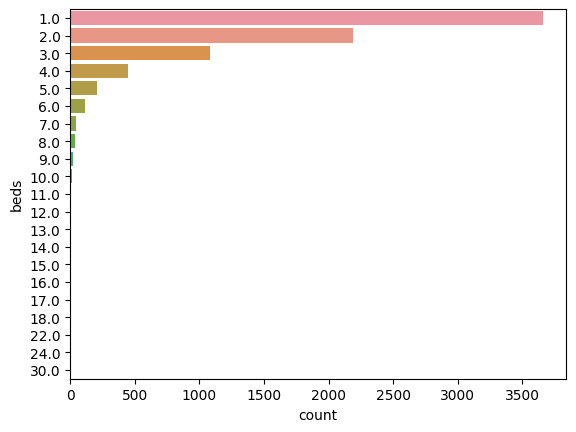

In [18]:
# Beds
sns.countplot(y='beds', data=montreal_df)

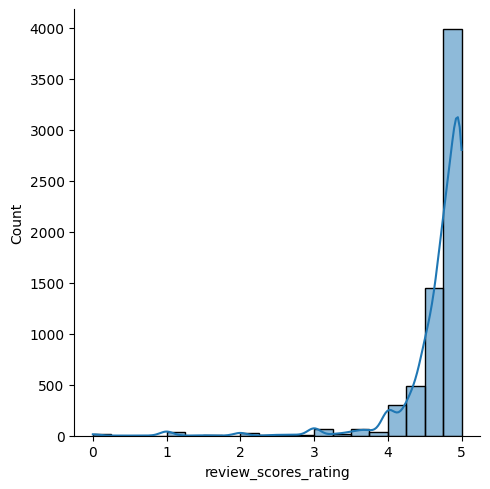

In [19]:
# Average review rating
sns.displot(montreal_df['review_scores_rating'], bins=20, kde=True)

In [22]:
# Plot latitude and longitude of listings using Folium
geometry = geopandas.points_from_xy(montreal_df.longitude, montreal_df.latitude)
crs = {'init': 'epsg:4326'}
montreal_gdf = geopandas.GeoDataFrame(montreal_df, crs=crs, geometry=geometry)

map = folium.Map(location=[45.5017, -73.5673], zoom_start=12, tiles="OpenStreetMap")
map
